# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

Als er geen water zou verdampen, gaat alle energie zitten in het verwarmen van het water. 
De functiefit geeft de lijn weer voor als er geen water verdampt.
De berekende hoeveelheid toegevoegde energie is dus: 155954.2 J
De energie die in het verwarmen van het water gaat zitten is: 105307.8 J
Door aan te nemen dat het verdampte water is opgewarmd tot 373K, kan de energie die in het verdampen van het water gaat zitten worden berekend.
Dit is: 5926.1 J
De energie voor het verdampen en opwarmen van water is in totaal: 111233.9 J
Het verschil tussen de toegevoegde energie en de energie die in het verwarmen en verdampen van het water gaat zitten, is de energie die verloren gaat aan de omgeving.


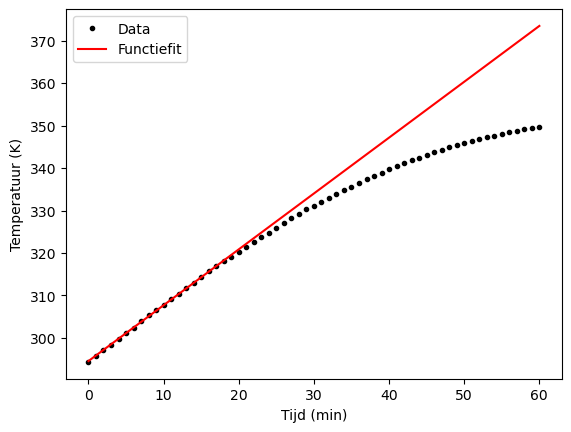

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

c_w = 4186 #J/kgK
m_begin = (1292.9 - 820.8)/(10**3) #g
m_eind = (1274.9 -820.8)/(10**3) #g

data = np.loadtxt('tempmetingen.csv', delimiter = ';', skiprows=1)
t = data[:,0] #min
t = t*60 #seconden
T = data[:,1] #graden
T = T + 273.15 #Kelvin

tslice = data[0:20,0]
Tslicer = data[0:20,1]
Tslice = Tslicer + 273.15

def lin(x, a, b):
    return a*x + b

val, cov = curve_fit(lin, tslice, Tslice)
t_fit = t/60
T_fit = lin(t_fit, val[0], val[1])

print("Als er geen water zou verdampen, gaat alle energie zitten in het verwarmen van het water. ")
print("De functiefit geeft de lijn weer voor als er geen water verdampt.")
print("De berekende hoeveelheid toegevoegde energie is dus:", round(c_w*m_begin*(T_fit[-1]-T_fit[0]),1), 'J')

print("De energie die in het verwarmen van het water gaat zitten is:", round(c_w*m_eind*(T[-1]-T[0]),1), 'J')
print("Door aan te nemen dat het verdampte water is opgewarmd tot 373K, kan de energie die in het verdampen van het water gaat zitten worden berekend.")
print("Dit is:", round((m_begin-m_eind)*c_w*(373-T[0]),1) , 'J')
print("De energie voor het verdampen en opwarmen van water is in totaal:", round(c_w*m_eind*(T[-1]-T[0]) + (m_begin-m_eind)*c_w*(373-T[0]),1), 'J')

print("Het verschil tussen de toegevoegde energie en de energie die in het verwarmen en verdampen van het water gaat zitten, is de energie die verloren gaat aan de omgeving.")

plt.figure()
plt.xlabel('Tijd (min)')
plt.ylabel('Temperatuur (K)')
plt.plot(t/60,T, 'k.', label= 'Data')
plt.plot(t_fit,T_fit, 'r-', label= 'Functiefit')
plt.legend()
plt.show()


Aannames
Trendlijn: Er verdampt geen water, Alle energie in het water, eerste 20 min geen verdamping
Als water bij 100 graden is verdampt water meteen